In [144]:
import numpy as np
import pandas as pd

# Loading the Data

In [145]:
data=pd.read_csv(r"E:\Praxis-BA-18\Term-2\datasets\healthcare\train_2v.csv")

In [146]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Data Preprocessing

In [147]:
data.groupby('stroke').count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,42617,42617,42617,42617,42617,42617,42617,42617,42617,41295,29470
1,783,783,783,783,783,783,783,783,783,643,638


The Data is highly inbalanced.Only around 2% observation is for stroke attack while 98% is not stroke.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


## Missing value detection and treatment

In [5]:
data.isnull().sum()


id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

BMI and Smoking_status has missing values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Droppinf unnecessary column

In [7]:
data=data.drop('id',axis=1)

In [8]:
data.shape

(43400, 11)

In [9]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [10]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [11]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [12]:
data.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [13]:
data['bmi']=pd.DataFrame(data['bmi'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [15]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

#  Corelation Check

In [148]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012760,0.006571,0.009234,0.024634,0.018839,0.002976
age,0.012760,1.000000,0.272169,0.250188,0.237627,0.358897,0.156049
hypertension,0.006571,0.272169,1.000000,0.119777,0.160211,0.161225,0.075332
heart_disease,0.009234,0.250188,0.119777,1.000000,0.146938,0.057677,0.113763
avg_glucose_level,0.024634,0.237627,0.160211,0.146938,1.000000,0.191295,0.078917
bmi,0.018839,0.358897,0.161225,0.057677,0.191295,1.000000,0.020285
stroke,0.002976,0.156049,0.075332,0.113763,0.078917,0.020285,1.000000


# Data Distribution check

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D293B0B358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D293EA0278>]], dtype=object)

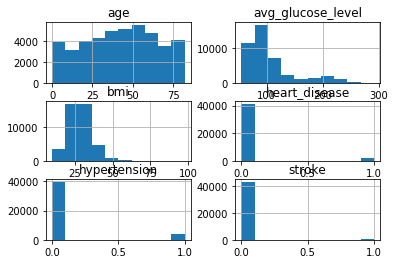

In [17]:
data.hist()

In [18]:
m=data['smoking_status'].mode()
print(m)
data['smoking_status']=data['smoking_status'].fillna(data['smoking_status'].mode()[0])

0    never smoked
dtype: object


In [19]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer

fai=fancyimpute.MICE(verbose=False)

df=fai.complete(data)

data1=pd.DataFrame(df)

data1.head()

var=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']

data1.columns=var

data1.head()

In [20]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
data.shape

(43400, 11)

In [22]:

data.groupby(['gender','hypertension'],axis=0)['stroke'].count()

gender  hypertension
Female  0               23412
        1                2253
Male    0               15916
        1                1808
Other   0                  11
Name: stroke, dtype: int64

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [25]:
data=pd.DataFrame(data)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
smoking_status       43400 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


# Dummy Value creation for categorical values

In [27]:
data1=pd.get_dummies(data,drop_first=True)

In [28]:
data1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,0,1,0
1,58.0,1,0,87.96,39.2,0,1,0,1,0,1,0,0,1,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,1,1,0
3,70.0,0,0,69.04,35.9,0,0,0,1,0,1,0,0,0,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,0,1,0


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 16 columns):
age                            43400 non-null float64
hypertension                   43400 non-null int64
heart_disease                  43400 non-null int64
avg_glucose_level              43400 non-null float64
bmi                            43400 non-null float64
stroke                         43400 non-null int64
gender_Male                    43400 non-null uint8
gender_Other                   43400 non-null uint8
ever_married_Yes               43400 non-null uint8
work_type_Never_worked         43400 non-null uint8
work_type_Private              43400 non-null uint8
work_type_Self-employed        43400 non-null uint8
work_type_children             43400 non-null uint8
Residence_type_Urban           43400 non-null uint8
smoking_status_never smoked    43400 non-null uint8
smoking_status_smokes          43400 non-null uint8
dtypes: float64(3), int64(3), uint8(10)
memory usage:

In [30]:
data1.shape

(43400, 16)

In [31]:
data1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,0,1,0
1,58.0,1,0,87.96,39.2,0,1,0,1,0,1,0,0,1,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,1,1,0
3,70.0,0,0,69.04,35.9,0,0,0,1,0,1,0,0,0,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,0,1,0


In [39]:
data1.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
avg_glucose_level              0
bmi                            0
stroke                         0
gender_Male                    0
gender_Other                   0
ever_married_Yes               0
work_type_Never_worked         0
work_type_Private              0
work_type_Self-employed        0
work_type_children             0
Residence_type_Urban           0
smoking_status_never smoked    0
smoking_status_smokes          0
dtype: int64

# Standardised the Data using minmax scaler

In [40]:
x=data1.drop('stroke',axis=1)
y=data1.loc[:,'stroke']

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [48]:
x=scaler.transform(x)

In [50]:
x=pd.DataFrame(x)

In [51]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.035645,0.0,0.0,0.169964,0.090286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.707031,1.0,0.0,0.139631,0.332571,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.096680,0.0,0.0,0.236772,0.085714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.853516,0.0,0.0,0.059479,0.294857,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.169922,0.0,0.0,0.450244,0.102857,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
var_name=['age','hypertension','heart_disease','avg_glucose_level','bmi','gender_Male','gender_Other','ever_married_Yes','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Urban','smoking_status_never smoked','smoking_status_smokes']

In [57]:
x.columns=var_name

In [58]:
x.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
avg_glucose_level              0
bmi                            0
gender_Male                    0
gender_Other                   0
ever_married_Yes               0
work_type_Never_worked         0
work_type_Private              0
work_type_Self-employed        0
work_type_children             0
Residence_type_Urban           0
smoking_status_never smoked    0
smoking_status_smokes          0
dtype: int64

In [59]:
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,0.035645,0.0,0.0,0.169964,0.090286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.707031,1.0,0.0,0.139631,0.332571,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.096680,0.0,0.0,0.236772,0.085714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.853516,0.0,0.0,0.059479,0.294857,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.169922,0.0,0.0,0.450244,0.102857,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

# Split the data into train and test

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score,roc_auc_score
rf = RandomForestClassifier(n_estimators=150,criterion='entropy', min_samples_leaf=5)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(X=x_test)
y_pred_rf
print(accuracy_score(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_rf))

0.984677419355
0.5


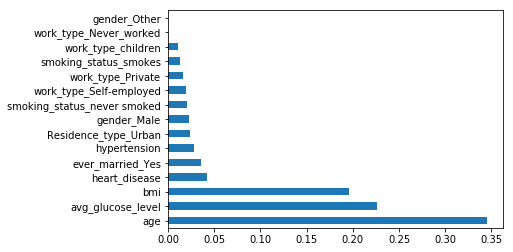

In [85]:
feature_importance = pd.Series(rf.feature_importances_,index=x_train.columns[0:46])
feature_importance = feature_importance.nlargest(15)
import matplotlib.pyplot as plt
%matplotlib inline
feature_importance.plot(kind='barh')

In [87]:
x1=x.loc[:,['age','avg_glucose_level','bmi','heart_disease','ever_married_Yes','hypertension','Residence_type_Urban','gender_Male']]
y1=data1.loc[:,'stroke']

In [88]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=45)

# Applying Various Model

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score,roc_auc_score
rf = RandomForestClassifier(n_estimators=150,criterion='entropy', min_samples_leaf=5,class_weight='balanced',max_depth=4,max_features=15)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(X=x_test)
y_pred_rf
print(accuracy_score(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_rf))

0.768778801843
0.778965226334


In [95]:
print(confusion_matrix(y_test,y_pred_rf))
print(cohen_kappa_score(y_test,y_pred_rf))

[[6568 1979]
 [  28  105]]
0.0678710118177


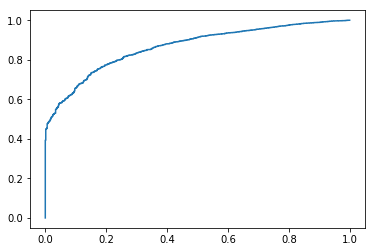

In [97]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
pred_prob_rf=rf.predict_proba(X=x_train)
tpr1, fpr1, th = roc_curve(y_train, pred_prob_rf[:,0]) 
plt.plot(fpr1, tpr1)

In [91]:
rf.fit(x1_train,y1_train)
y_pred_rf1=rf.predict(X=x1_test)
print(accuracy_score(y_test,y_pred_rf1))
print(roc_auc_score(y_test,y_pred_rf1))

0.687442396313
0.759869575659


In [98]:
print(confusion_matrix(y_test,y_pred_rf1))
print(cohen_kappa_score(y_test,y_pred_rf1))

[[5856 2691]
 [  22  111]]
0.0477802522783


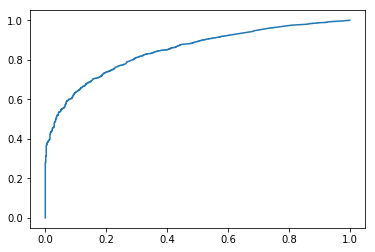

In [99]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
pred_prob_rf1=rf1.predict_proba(X=x_train)
tpr1, fpr1, th = roc_curve(y_train, pred_prob_rf1[:,0]) 
plt.plot(fpr1, tpr1)

In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
rf1=RandomForestClassifier(warm_start=True,n_estimators=150,max_depth=4,max_features = 10, criterion = 'entropy')
smote_pipe_rf = make_imb_pipeline(SMOTE(), rf1)
smote_pipe_rf.fit(x_train,y_train)
y_pred_sm=smote_pipe_rf.predict(x_test)
print(accuracy_score(y_test,y_pred_sm))
print(roc_auc_score(y_test,y_pred_sm))

0.73064516129
0.744798113219


In [100]:
print(confusion_matrix(y_test,y_pred_sm))
print(cohen_kappa_score(y_test,y_pred_sm))

[[6241 2306]
 [  32  101]]
0.0519970674928


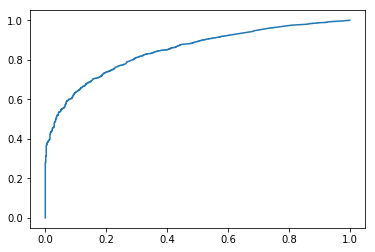

In [101]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
pred_prob_sm=smote_pipe_rf.predict_proba(X=x_train)
tpr1, fpr1, th = roc_curve(y_train, pred_prob_sm[:,0]) 
plt.plot(fpr1, tpr1)

In [68]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=10)
cart = DecisionTreeClassifier(class_weight='balanced')
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=150,bootstrap=True, random_state=10,max_features=3)
model1=make_imb_pipeline(SMOTE(),model)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(roc_auc_score(y_test,y_pred1))

0.980875576037
0.527676685571


In [76]:
cart = DecisionTreeClassifier()

model2=make_imb_pipeline(SMOTE(),cart)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(roc_auc_score(y_test,y_pred2))

0.947811059908
0.525690762533


In [102]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
model3=make_imb_pipeline(SMOTE(),lr_model)
model3.fit(X=x_train, y=y_train)
y_pred_lr=model3.predict(X=x_test)
print(y_pred_lr)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_lr))
print(roc_auc_score(y_test,y_pred_lr))

[0 1 0 ..., 1 0 0]
0.74297235023
0.769562111667


In [103]:
print(confusion_matrix(y_test,y_pred_lr))
print(cohen_kappa_score(y_test,y_pred_lr))

[[6343 2204]
 [  27  106]]
0.059526642507


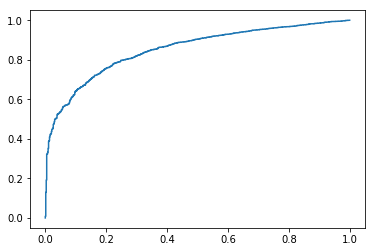

In [104]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
pred_prob_lr=model3.predict_proba(X=x_train)
tpr1, fpr1, th = roc_curve(y_train, pred_prob_lr[:,0]) 
plt.plot(fpr1, tpr1)

In [71]:
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Binomial

In [72]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 16 columns):
age                            43400 non-null float64
hypertension                   43400 non-null int64
heart_disease                  43400 non-null int64
avg_glucose_level              43400 non-null float64
bmi                            43400 non-null float64
stroke                         43400 non-null int64
gender_Male                    43400 non-null uint8
gender_Other                   43400 non-null uint8
ever_married_Yes               43400 non-null uint8
work_type_Never_worked         43400 non-null uint8
work_type_Private              43400 non-null uint8
work_type_Self-employed        43400 non-null uint8
work_type_children             43400 non-null uint8
Residence_type_Urban           43400 non-null uint8
smoking_status_never smoked    43400 non-null uint8
smoking_status_smokes          43400 non-null uint8
dtypes: float64(3), int64(3), uint8(10)
memory usage:

In [73]:
model=glm('stroke~ age+avg_glucose_level+hypertension+heart_disease+smoking_status_smokes', data=data1, family=Binomial()).fit()

In [80]:
####model1=glm('stroke~age+hypertension+heart_disease+avg_glucose_level+bmi+gender_Male+gender_Other+ever_married_Yes+work_type_Never_worked+work_type_Private+work_type_children+Residence_type_Urban+smoking_status_smokes',data=data1,family=Binomial()).fit()

In [82]:
 #print(model1.summary())

In [74]:
 print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                43400
Model:                            GLM   Df Residuals:                    43394
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3225.4
Date:                Wed, 27 Jun 2018   Deviance:                       6450.7
Time:                        18:21:51   Pearson chi2:                 3.73e+04
No. Iterations:                     9                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -8.6589      0.207    -41.896      0.000      -9.064      -8.254
age                

In [105]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameters = {'n_estimators': [50, 500],
    'max_features': ['auto', 'sqrt', 'log2']}

In [114]:
#param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [119]:
grid_model=GridSearchCV(rf,parameters)

In [120]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=4, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
y_pred3=grid_model.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(roc_auc_score(y_test,y_pred3))

0.68767281106
0.748883880463


In [122]:
print(confusion_matrix(y_test,y_pred3))
print(cohen_kappa_score(y_test,y_pred3))

[[5861 2686]
 [  25  108]]
0.0458852873493


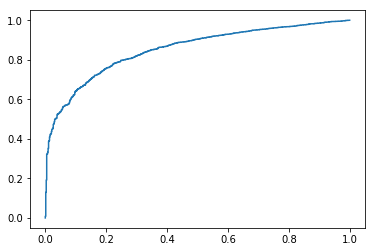

In [123]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline
pred_prob_gd=model3.predict_proba(X=x_train)
tpr1, fpr1, th = roc_curve(y_train, pred_prob_gd[:,0]) 
plt.plot(fpr1, tpr1)

In [134]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [135]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [137]:
random_model=RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10)

In [139]:
random_model.fit(x_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=4, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D296D020F0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D296D02240>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D296D02390>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_sta

In [141]:
y_pred_rand=random_model.predict(x_test)
print(accuracy_score(y_test,y_pred_rand))
print(roc_auc_score(y_test,y_pred_rand))

0.984216589862
0.499765999766


In [142]:
print(confusion_matrix(y_test,y_pred_rand))
print(cohen_kappa_score(y_test,y_pred_rand))

[[8543    4]
 [ 133    0]]
-0.000895550527904


In [126]:
import sklearn
report = sklearn.metrics.classification_report( y_test, y_pred_rf)

In [128]:
print(report)

             precision    recall  f1-score   support

          0       1.00      0.77      0.87      8547
          1       0.05      0.79      0.09       133

avg / total       0.98      0.77      0.86      8680



In [130]:
report1 = sklearn.metrics.classification_report( y_test, y_pred_lr)
print(report1)

             precision    recall  f1-score   support

          0       1.00      0.74      0.85      8547
          1       0.05      0.80      0.09       133

avg / total       0.98      0.74      0.84      8680



# Conclusion

Applied various classification techniques like logistic regression,randomforest classifier and decissiontree classifier. As the Dataset is highly inbalanced used SMOTE technique to improve accuracy. For Random forest classifier using SMOTE got highest accuracy i.e 87%.